In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [5]:
df=pd.read_csv('diabetes_prediction_dataset.csv')

In [6]:
df[df.diabetes==1]


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1


In [7]:
df.shape

(100000, 9)

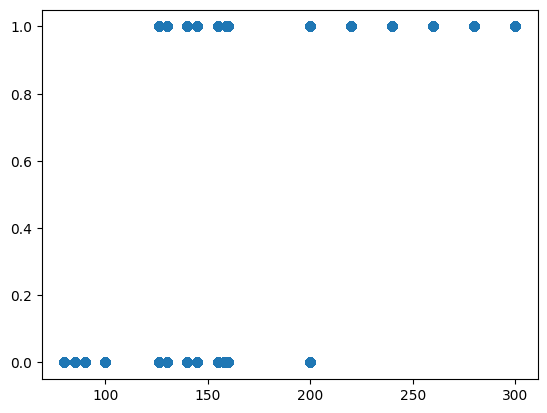

In [8]:
plt.scatter(df.blood_glucose_level,df.diabetes)
plt.show()

In [9]:
x=df.drop(['gender','smoking_history','diabetes'],axis=1).values
y=df['diabetes'].values

In [10]:
x


array([[ 80.  ,   0.  ,   1.  ,  25.19,   6.6 , 140.  ],
       [ 54.  ,   0.  ,   0.  ,  27.32,   6.6 ,  80.  ],
       [ 28.  ,   0.  ,   0.  ,  27.32,   5.7 , 158.  ],
       ...,
       [ 66.  ,   0.  ,   0.  ,  27.83,   5.7 , 155.  ],
       [ 24.  ,   0.  ,   0.  ,  35.42,   4.  , 100.  ],
       [ 57.  ,   0.  ,   0.  ,  22.43,   6.6 ,  90.  ]])

In [11]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [13]:
x_train

array([[ 80.  ,   0.  ,   0.  ,  27.32,   4.8 , 159.  ],
       [  0.72,   0.  ,   0.  ,  16.02,   5.8 ,  90.  ],
       [ 32.  ,   0.  ,   0.  ,  27.28,   6.6 , 159.  ],
       ...,
       [ 66.  ,   0.  ,   0.  ,  41.23,   9.  , 145.  ],
       [ 37.  ,   0.  ,   0.  ,  30.18,   5.8 ,  90.  ],
       [ 52.  ,   0.  ,   0.  ,  27.32,   4.5 , 158.  ]])

In [14]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

c:\Users\Melissa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred=reg.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [16]:
reg.predict([[55.0,0,1,30.42,6.2,300]])

array([1], dtype=int64)

In [19]:

r2_score(y_test,y_pred)




0.43892644829154315

In [23]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_pred,y_test)
cn

array([[27210,  1053],
       [  251,  1486]], dtype=int64)

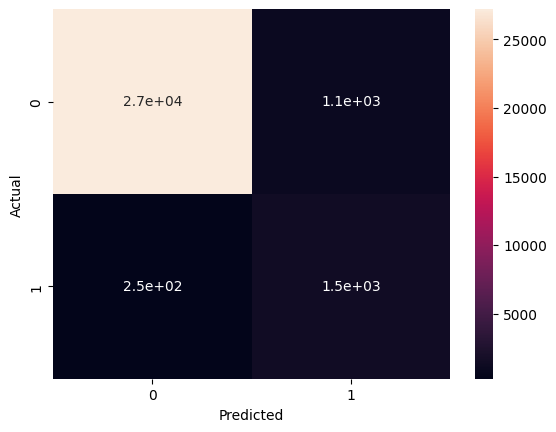

In [25]:
import seaborn as sn
sn.heatmap(cn ,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()